In [1]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import sklearn  as skl

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA

import sklearn as skl
import time as t
from IPython.display import display, clear_output

import json
import pickle

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24

Pandas   1.2.4
Sklearn  0.24.2


In [2]:
ppdf = pd.read_csv("/work/Run_For_Life/dataset_halfSecondWindow.csv", index_col=0)

In [3]:
ppdf.head()

,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,156661,3.0,NaN,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,156662,4.0,NaN,62.0,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,156663,5.0,NaN,62.0,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
3,156664,6.0,NaN,62.0,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
4,156665,7.0,NaN,62.0,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12


### Exploratory Data Analysis

In [ ]:
ppdf.columns

Index(['id', 'time', 'activityrecognition#0', 'activityrecognition#1',
       'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min',
       'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std',
       'android.sensor.game_rotation_vector#mean',
       'android.sensor.game_rotation_vector#min',
       'android.sensor.game_rotation_vector#max',
       'android.sensor.game_rotation_vector#std',
       'android.sensor.gravity#mean', 'android.sensor.gravity#min',
       'android.sensor.gravity#max', 'android.sensor.gravity#std',
       'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min',
       'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std',
       'android.sensor.gyroscope_uncalibrated#mean',
       'android.sensor.gyroscope_uncalibrated#min',
       'android.sensor.gyroscope_uncalibrated#max',
       'android.sensor.gyroscope_uncalibrated#std',
       'android.sensor.light#mean', 'android.sensor.light#min',
       'android.se

ignore:
light, pressure, magnetic field, gravity,rotation vector, sound, uncalibrated gyroscope and
proximity.

In [4]:
small_df = ppdf.drop([#'android.sensor.light#mean', 
       #'android.sensor.light#min',
       #'android.sensor.light#max', 
       #'android.sensor.light#std',
       #'android.sensor.pressure#mean', 
       #'android.sensor.pressure#min',
       #'android.sensor.pressure#max', 
       #'android.sensor.pressure#std',
       #'android.sensor.magnetic_field#mean',
       #'android.sensor.magnetic_field#min',
       #'android.sensor.magnetic_field#max',
       #'android.sensor.magnetic_field#std',
       #'android.sensor.magnetic_field_uncalibrated#mean',
       #'android.sensor.magnetic_field_uncalibrated#min',
       #'android.sensor.magnetic_field_uncalibrated#max',
       #'android.sensor.magnetic_field_uncalibrated#std',
       #'android.sensor.gravity#mean', 
       #'android.sensor.gravity#min',
       #'android.sensor.gravity#max', 
       #'android.sensor.gravity#std',
       #'android.sensor.proximity#mean', 
       #'android.sensor.proximity#min',
       #'android.sensor.proximity#max', 
       #'android.sensor.proximity#std',
       #'android.sensor.rotation_vector#mean',
       #'android.sensor.rotation_vector#min',
       #'android.sensor.rotation_vector#max',
       #'android.sensor.rotation_vector#std',
       #'sound#mean', 
       #'sound#min', 
       #'sound#max', 
       #'sound#std',
       #'android.sensor.gyroscope_uncalibrated#mean',
       #'android.sensor.gyroscope_uncalibrated#min',
       #'android.sensor.gyroscope_uncalibrated#max',
       #'android.sensor.gyroscope_uncalibrated#std',
       #'activityrecognition#0',
       #'activityrecognition#1',
       'id'],axis=1)

In [ ]:
small_df.head()

,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,3.0,NaN,62.0,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,0.762086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,4.0,NaN,62.0,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,0.654833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,5.0,NaN,62.0,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,0.713222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
3,6.0,NaN,62.0,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,0.748520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
4,7.0,NaN,62.0,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,0.749263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12


In [ ]:
#for n, c in zip(n,c):
#    print(n,c)
#print(small_df.info())

In [ ]:
#small_df=small_df.dropna(subset=['speed#mean', 'speed#std','android.sensor.accelerometer#mean','android.sensor.accelerometer#std',
#    'android.sensor.linear_acceleration#mean','android.sensor.linear_acceleration#std'])#,inplace=True)
#small_df=small_df.fillna(0)
#small_df

#### Plotting

#### Sensor Light

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.light#mean'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f742d50d290> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.light#min'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fac958694d0> (for post_execute):


KeyboardInterrupt: 

#### Pressure

In [5]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.pressure#mean'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd14664d290> (for post_execute):


KeyboardInterrupt: 

In [6]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.pressure#std'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

Error in callback <function flush_figures at 0x7fd14664d290> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.pressure#max'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.pressure#min'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

#### Magnetic Field

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.magnetic_field#mean'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.magnetic_field#std'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.magnetic_field#max'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.magnetic_field#min'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

#### Gravity

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.gravity#mean'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.gravity#std'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.gravity#min'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.gravity#max'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

#### Proximity

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.proximity#mean'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

NameError: name 'sns' is not defined

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.magnetic_field#min'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,1])
#plt.ylim([0,1000])
sns.despine()

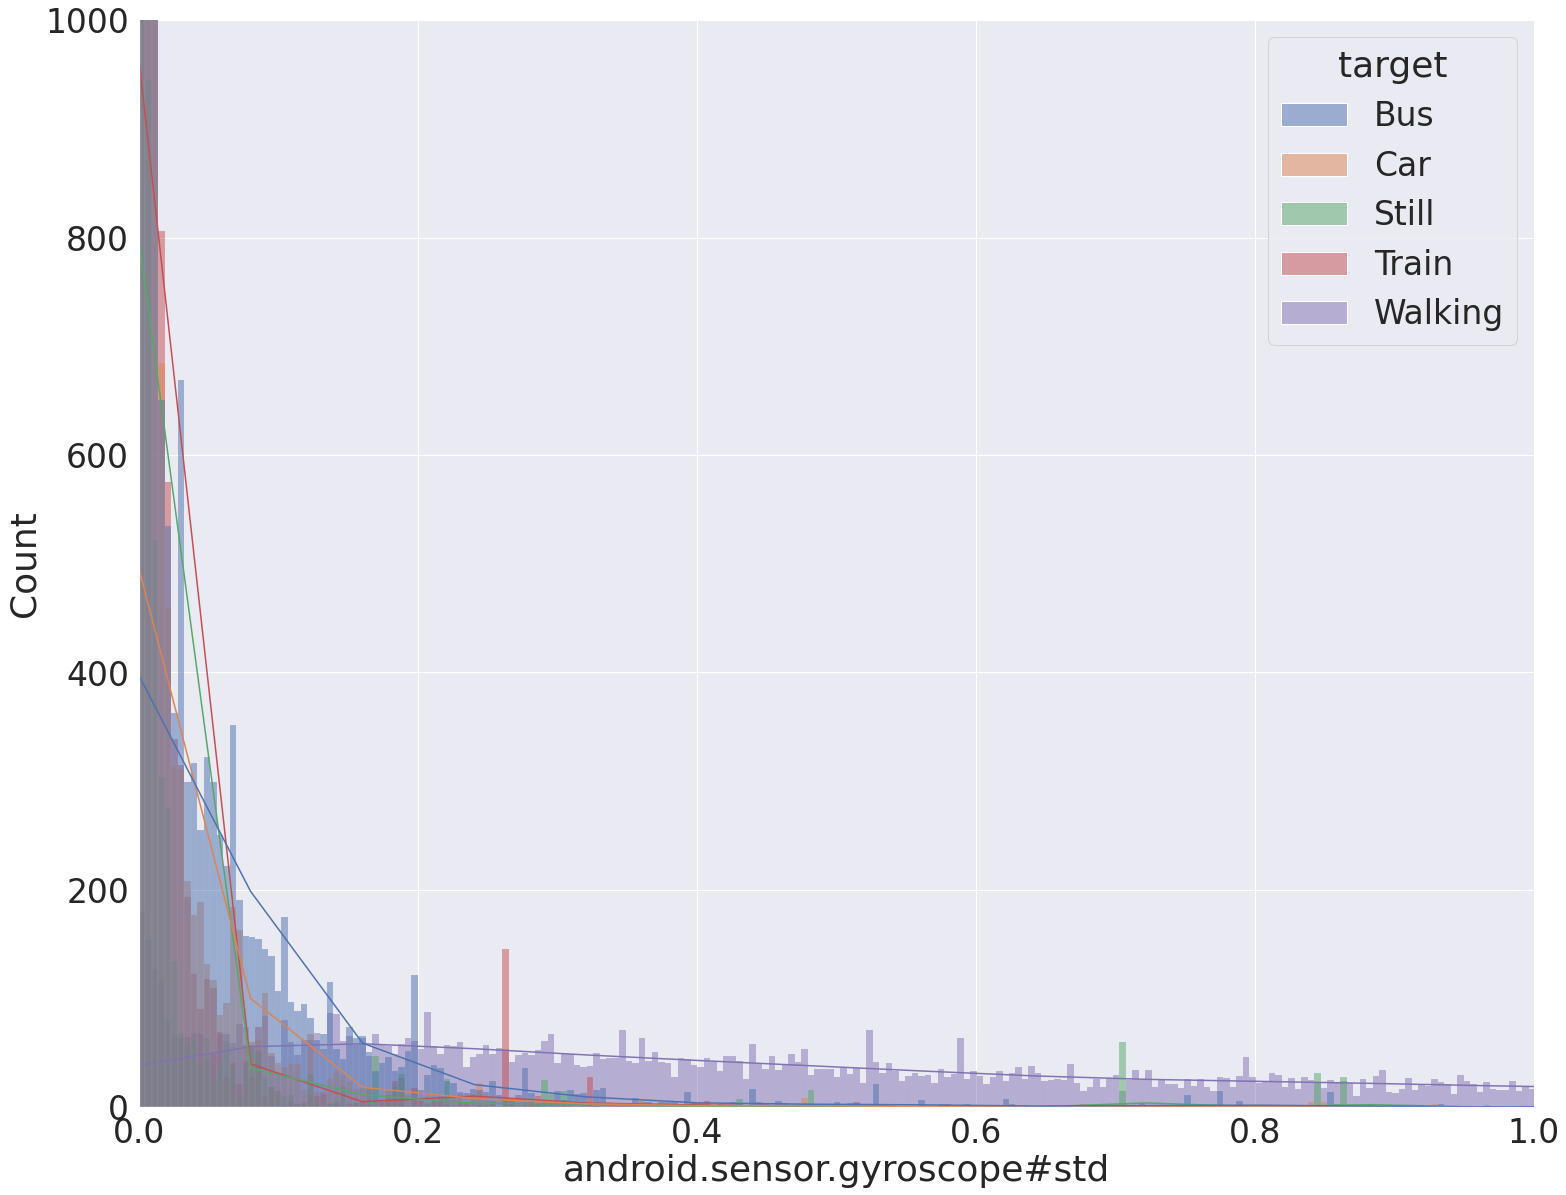

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.gyroscope#std'], kde=True,color="r",hue=small_df["target"])
plt.xlim([0,1])
plt.ylim([0,1000])
sns.despine()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


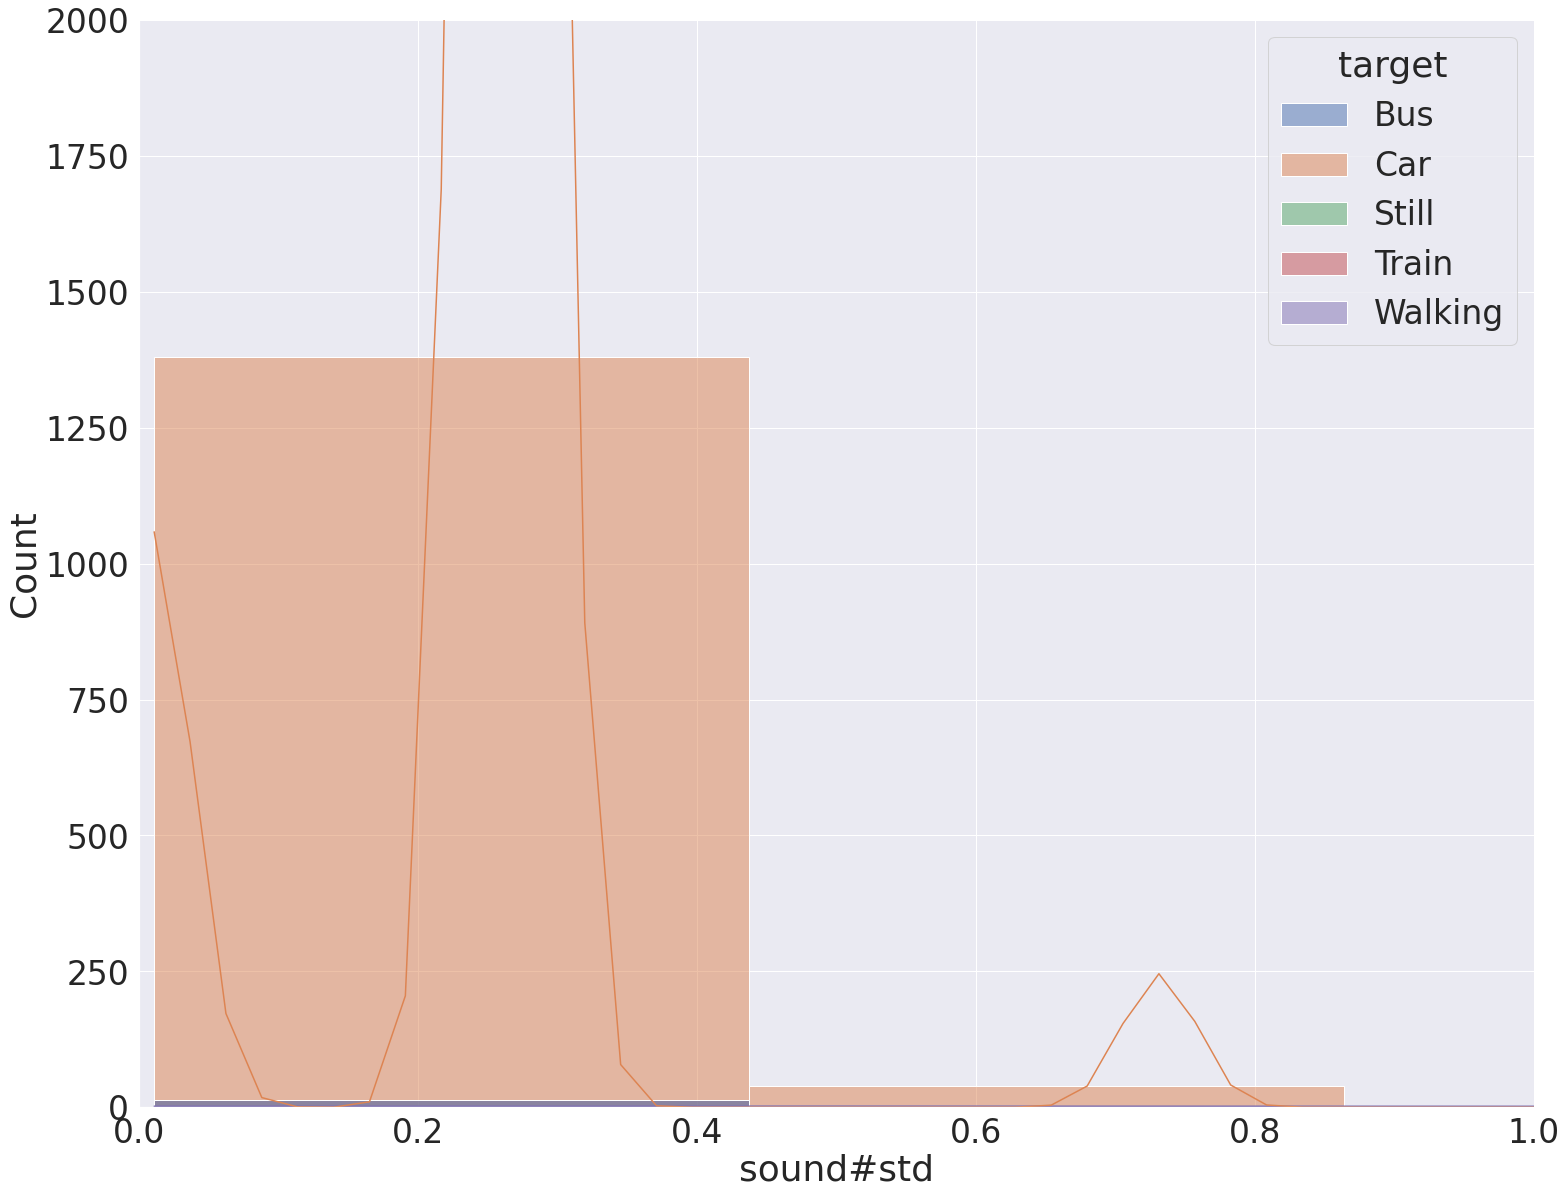

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['sound#std'], kde=True,color="r",hue=small_df["target"])
plt.xlim([0,1])
plt.ylim([0,2000])
sns.despine()

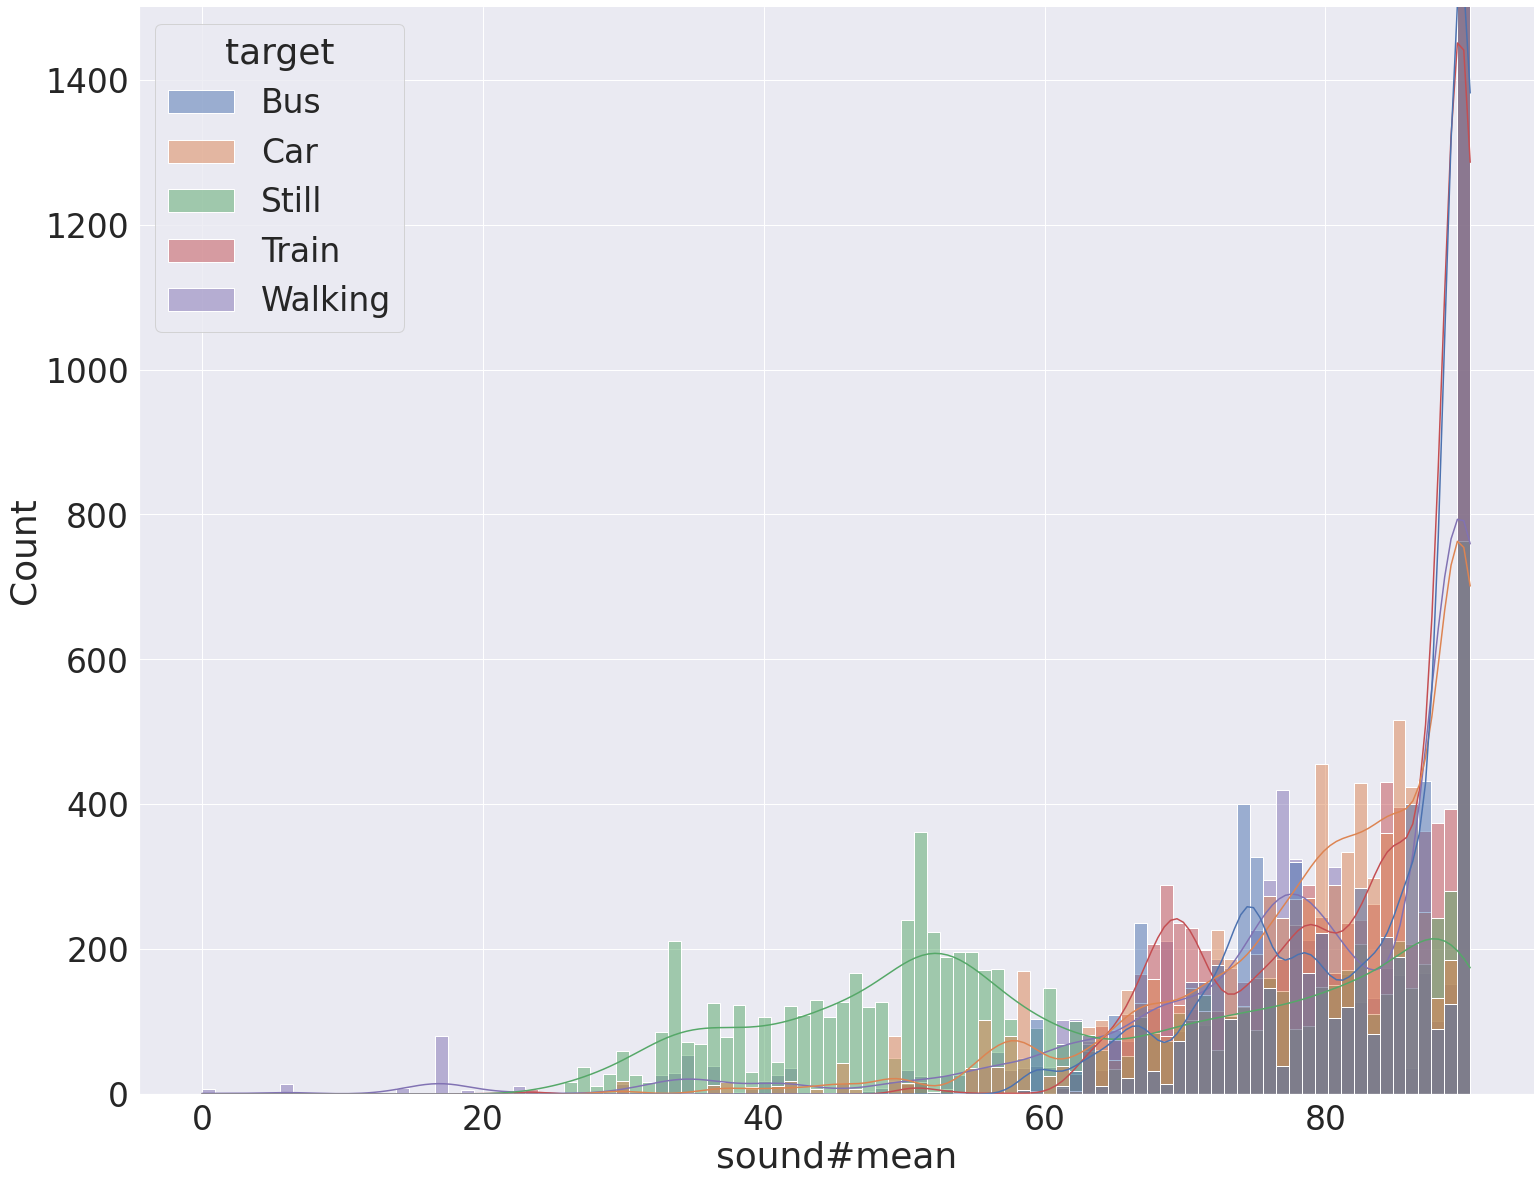

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['sound#mean'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([0,15])
plt.ylim([0,1500])
sns.despine()

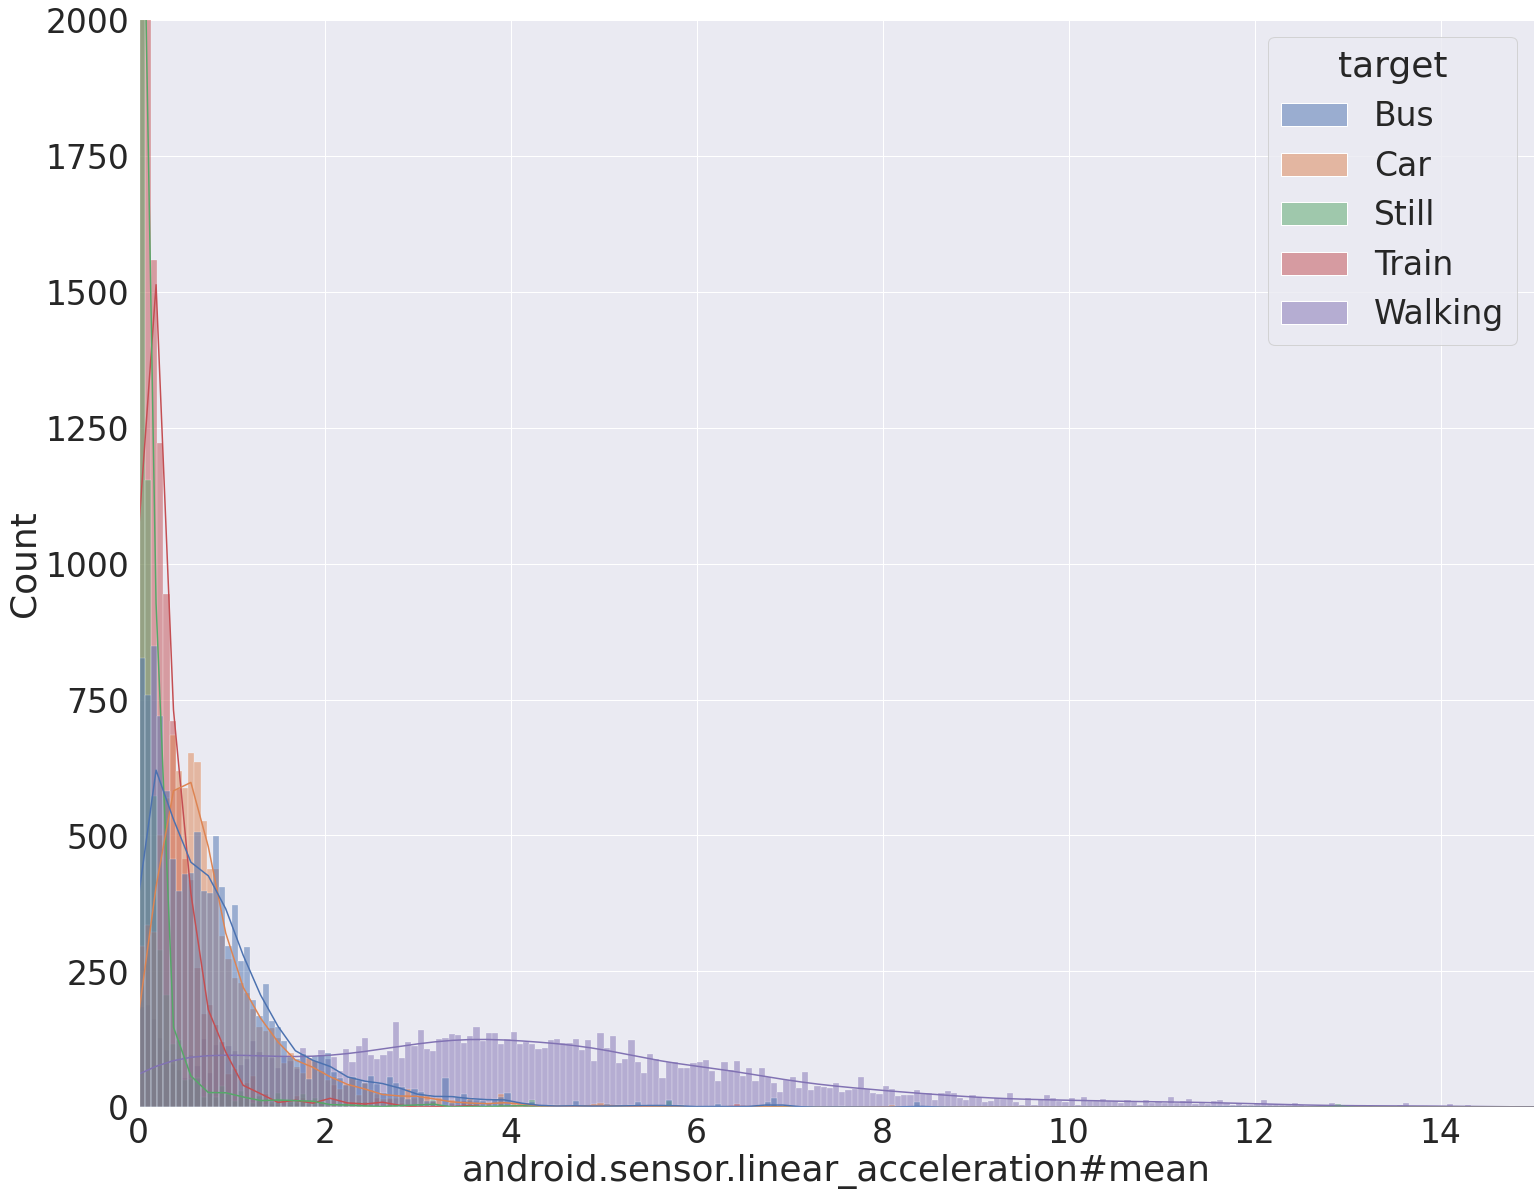

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.linear_acceleration#mean'], kde=True,color="r",hue=small_df["target"])
plt.xlim([0,15])
plt.ylim([0,2000])
sns.despine()

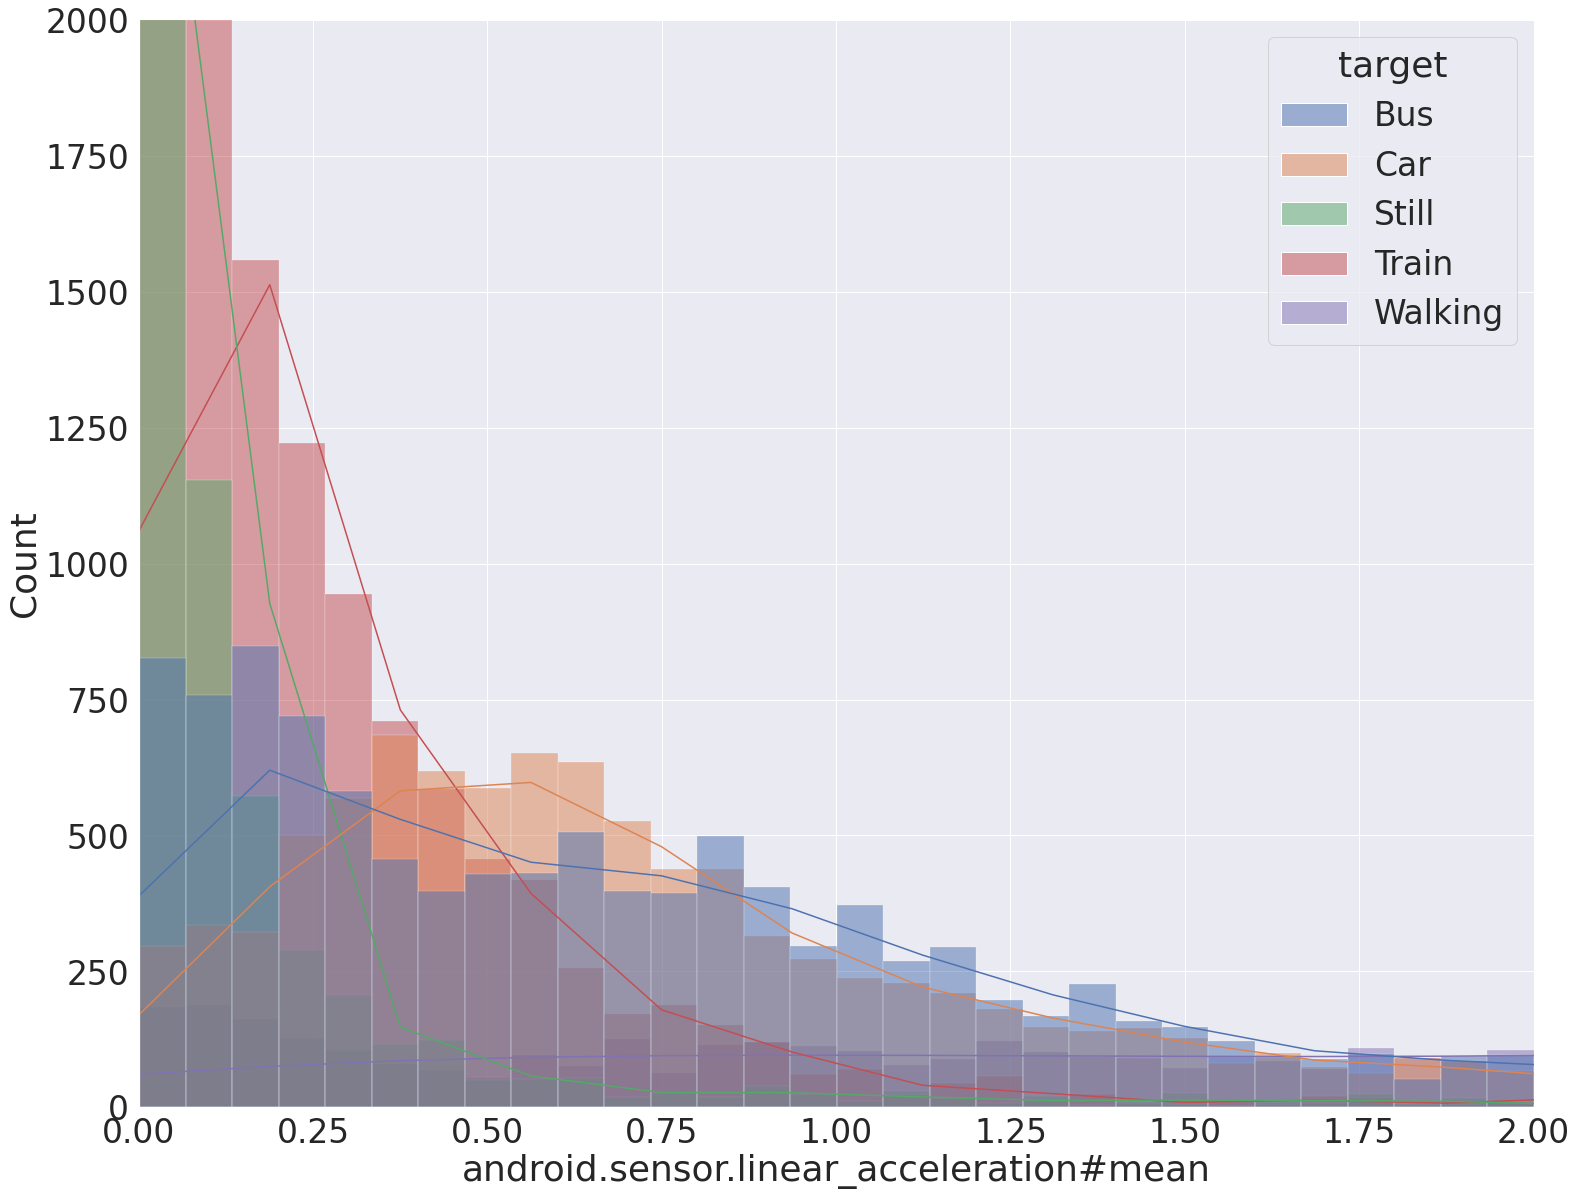

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.linear_acceleration#mean'], kde=True,color="r",hue=small_df["target"])
plt.xlim([0,2])
plt.ylim([0,2000])
sns.despine()

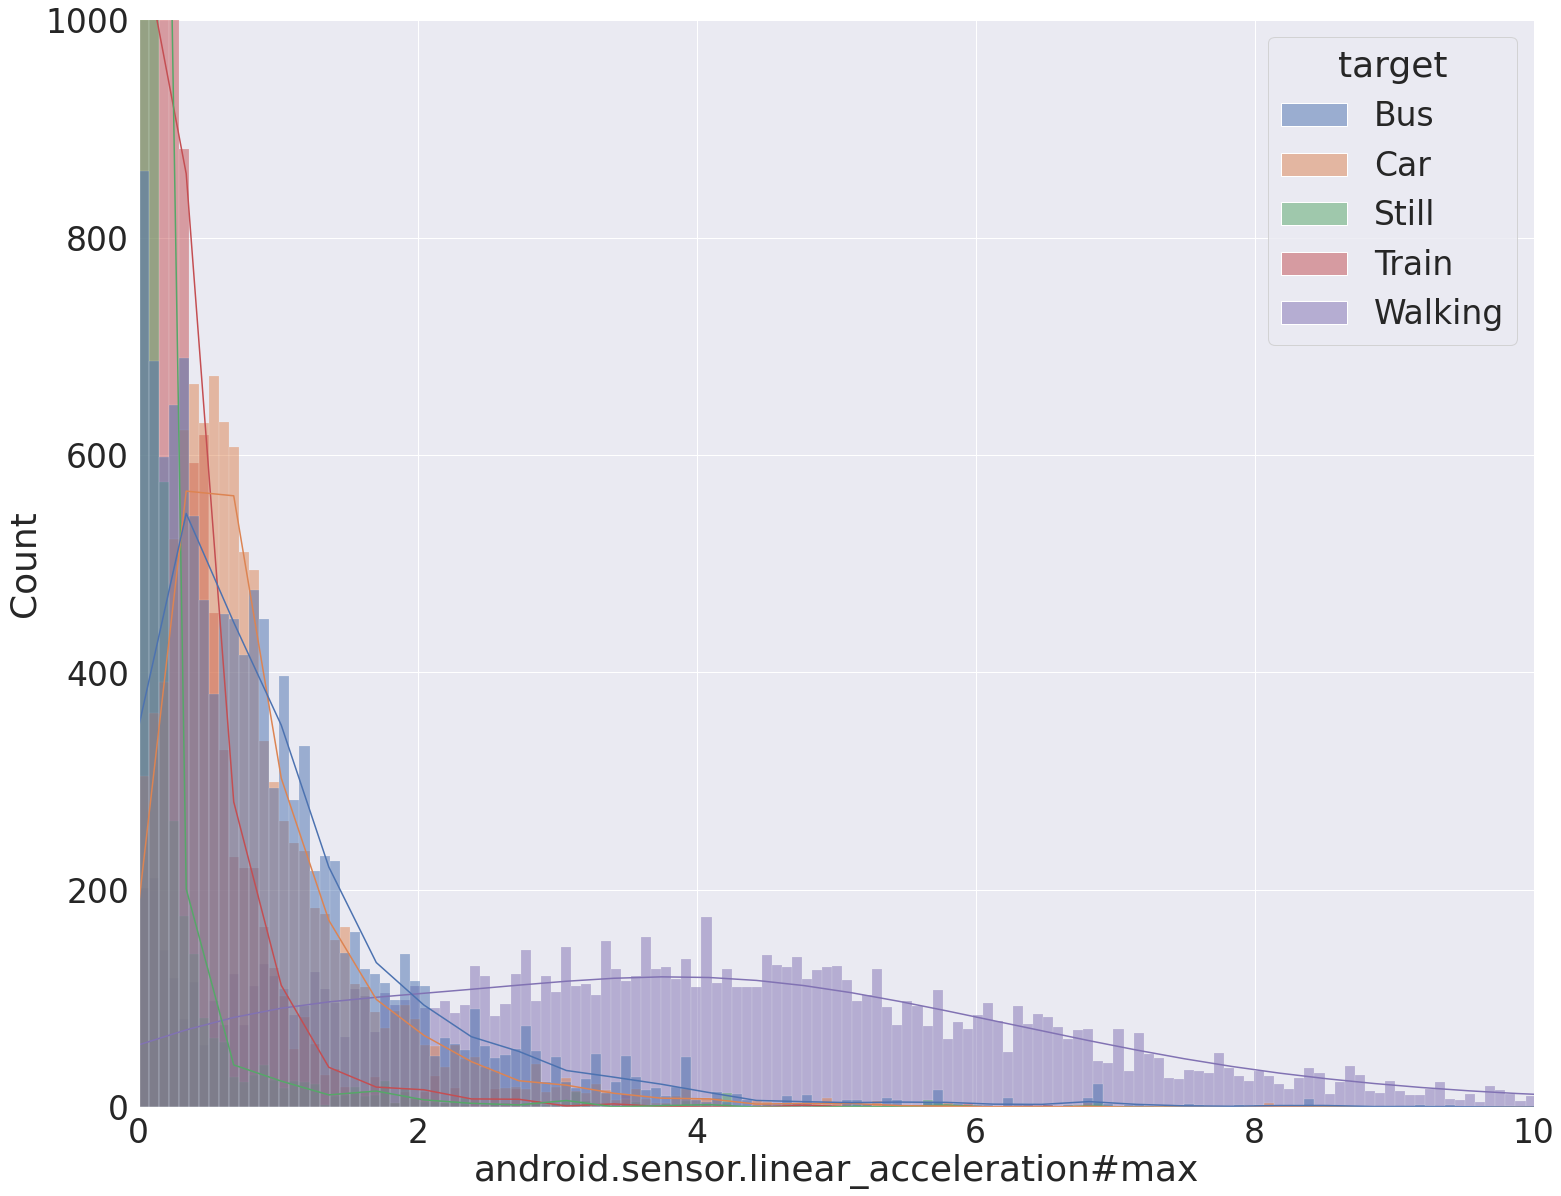

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.linear_acceleration#max'], kde=True,color="r",hue=small_df["target"])
plt.xlim([0,10])
plt.ylim([0,1000])
sns.despine()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


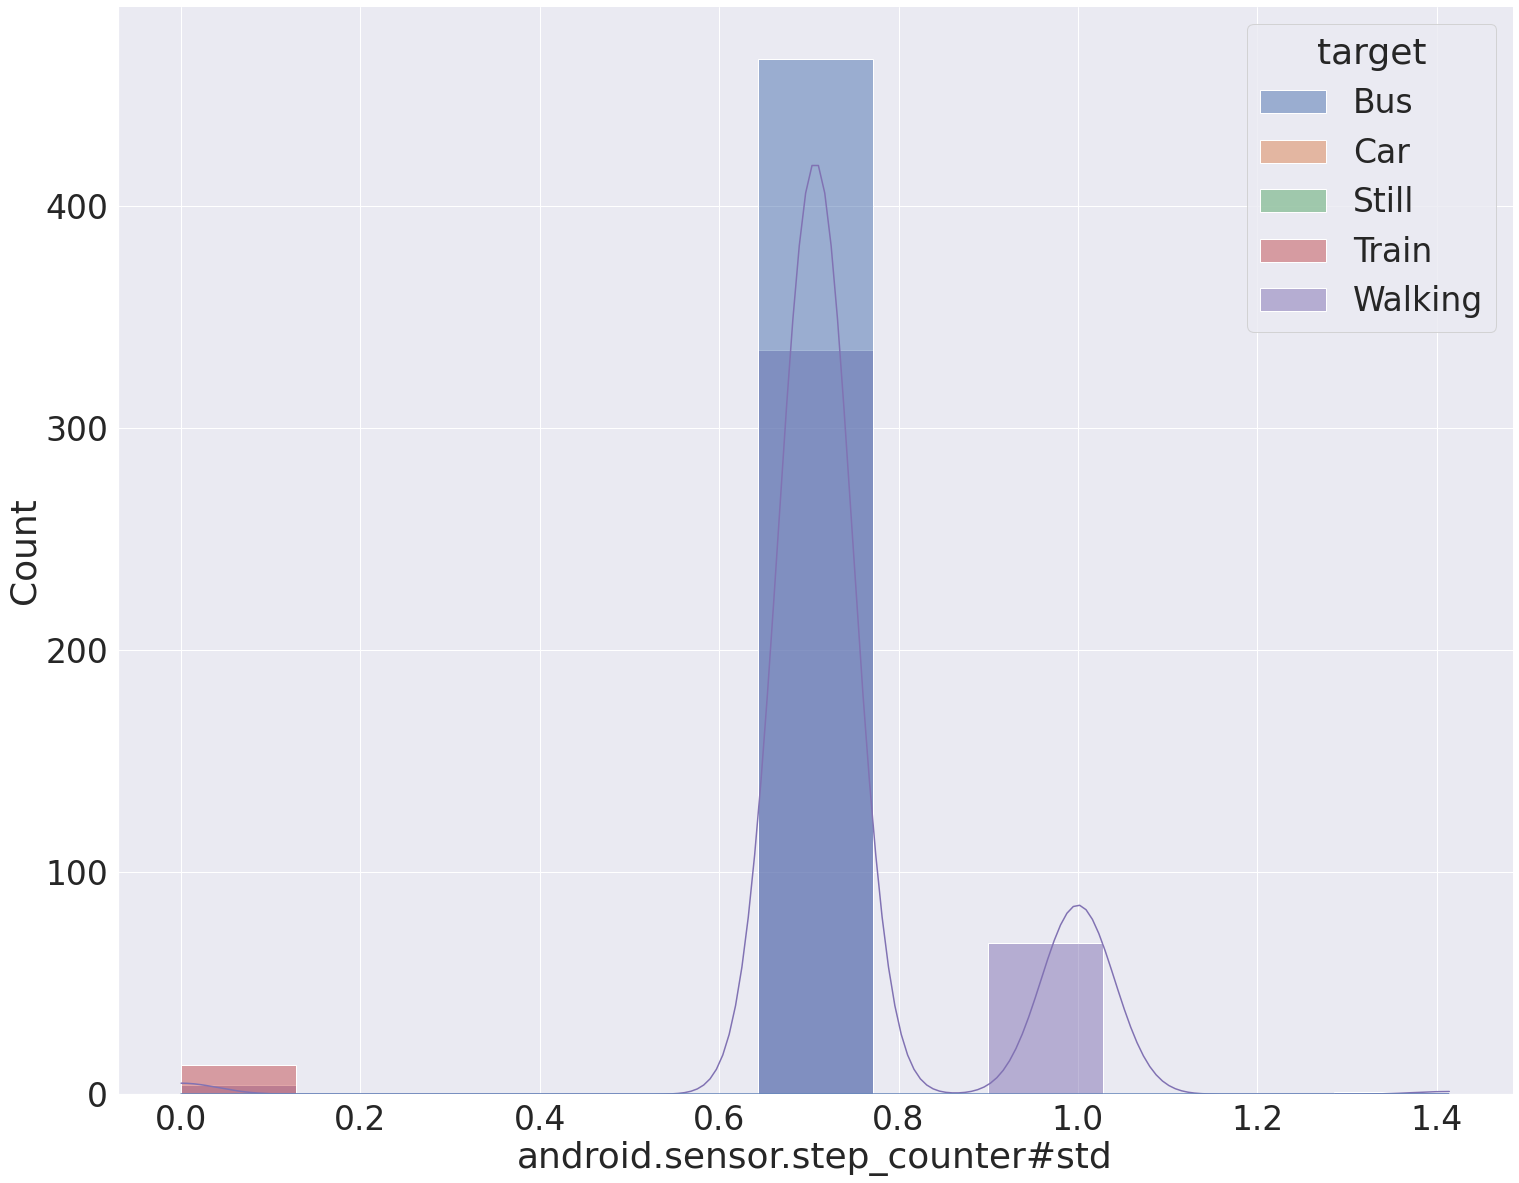

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.step_counter#std'], kde=True,color="r",hue=small_df["target"])
#plt.xlim([5,15])
#plt.ylim([0,500])
sns.despine()

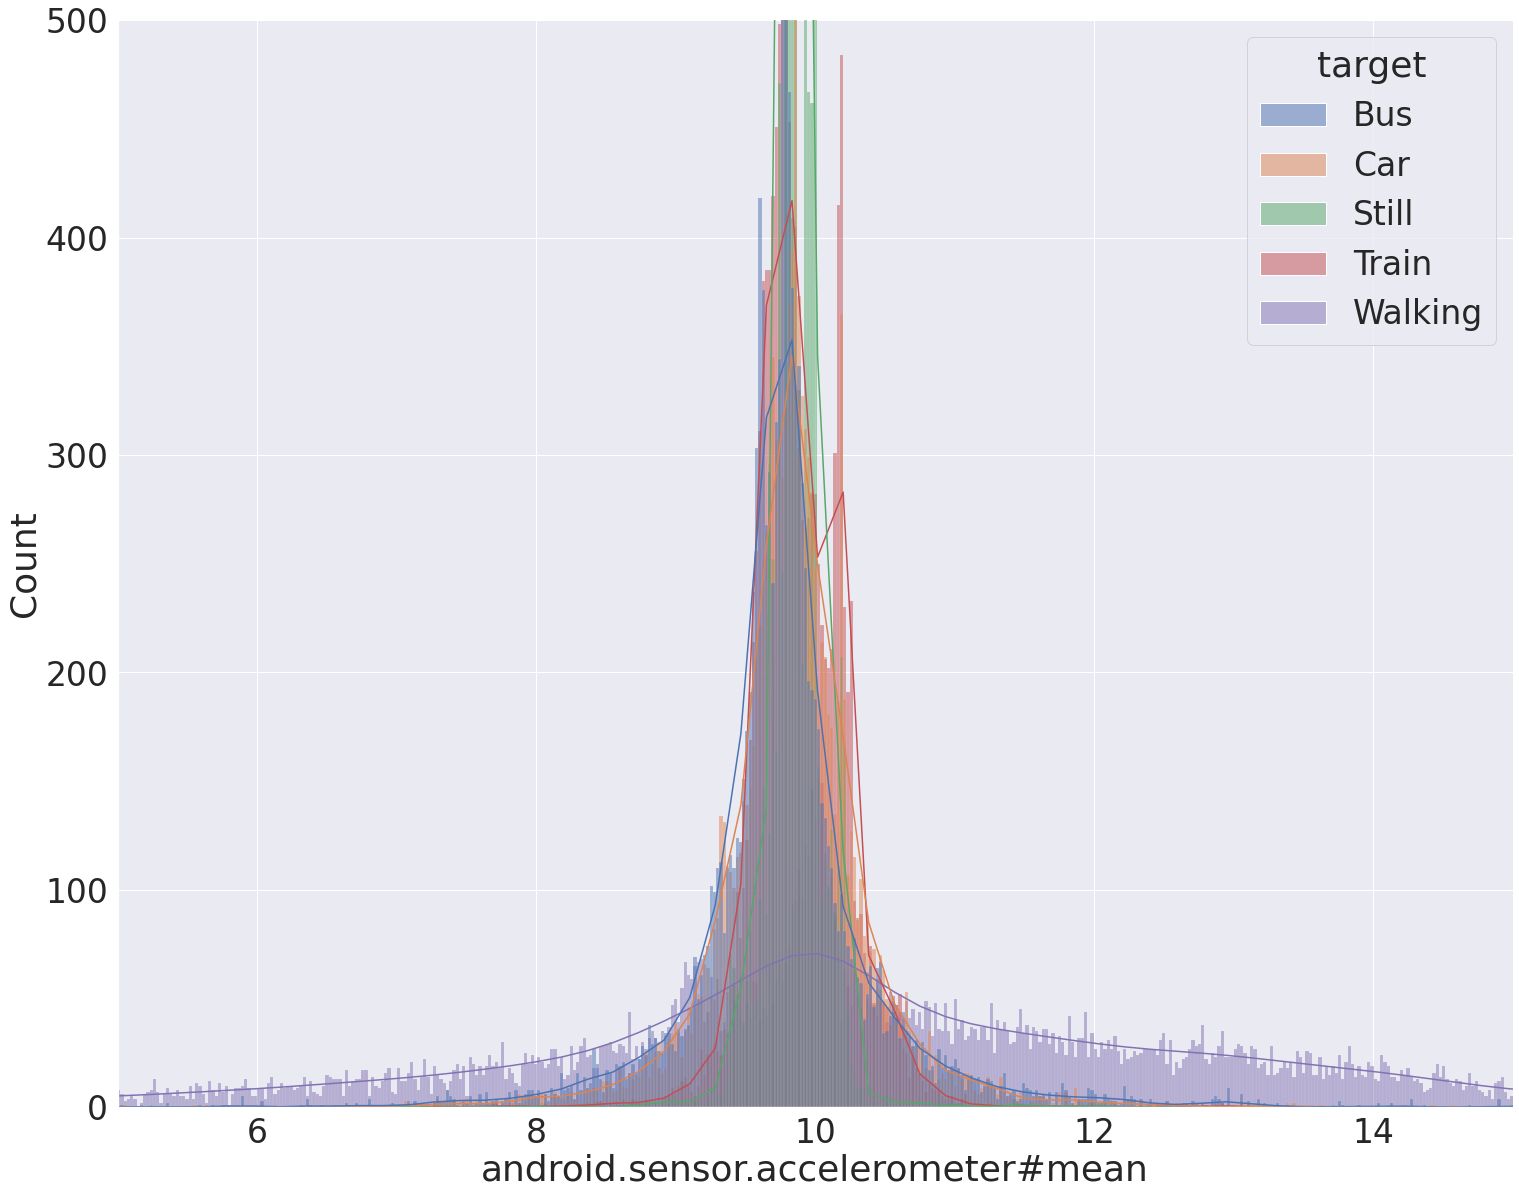

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.accelerometer#mean'], kde=True,color="r",hue=small_df["target"])
plt.xlim([5,15])
plt.ylim([0,500])
sns.despine()

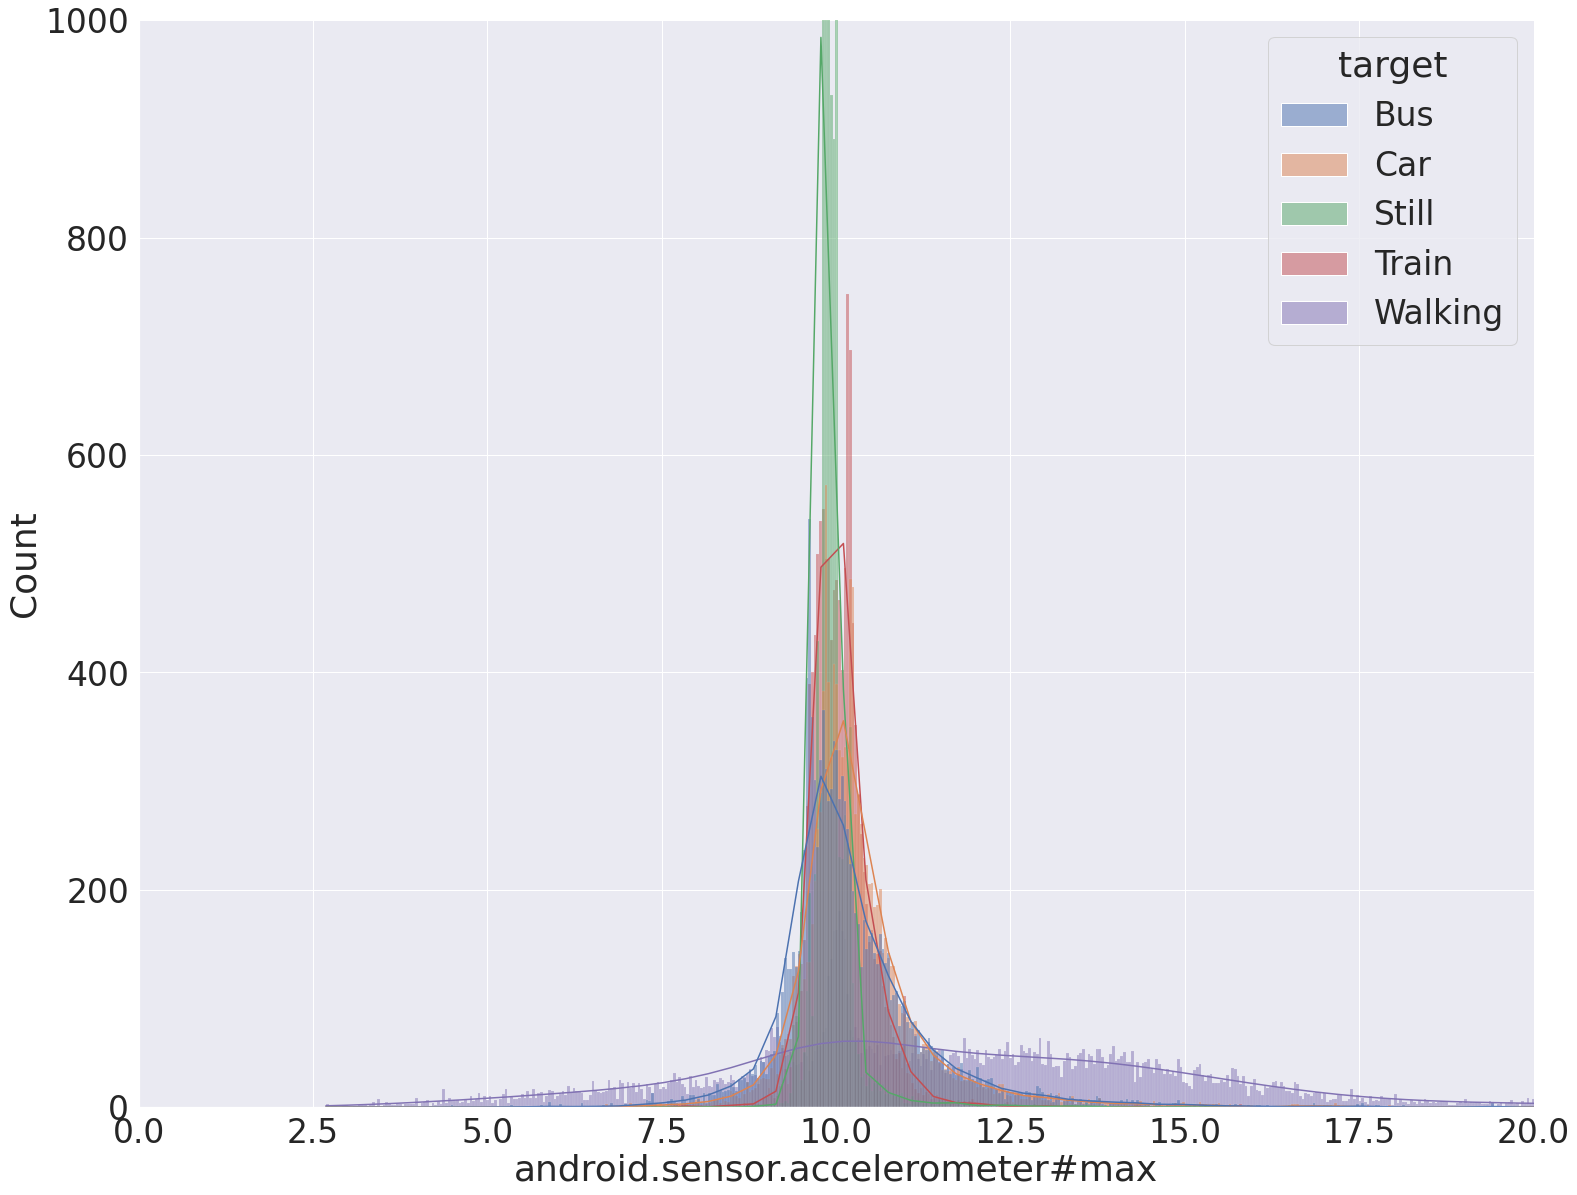

In [ ]:
sns.set(font_scale= 3)
plt.figure(figsize=(25, 20))
sns.histplot(x=small_df['android.sensor.accelerometer#max'], kde=True,color="b",hue=small_df["target"])
plt.xlim([0,20])
plt.ylim([0,1000])
sns.despine()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWa

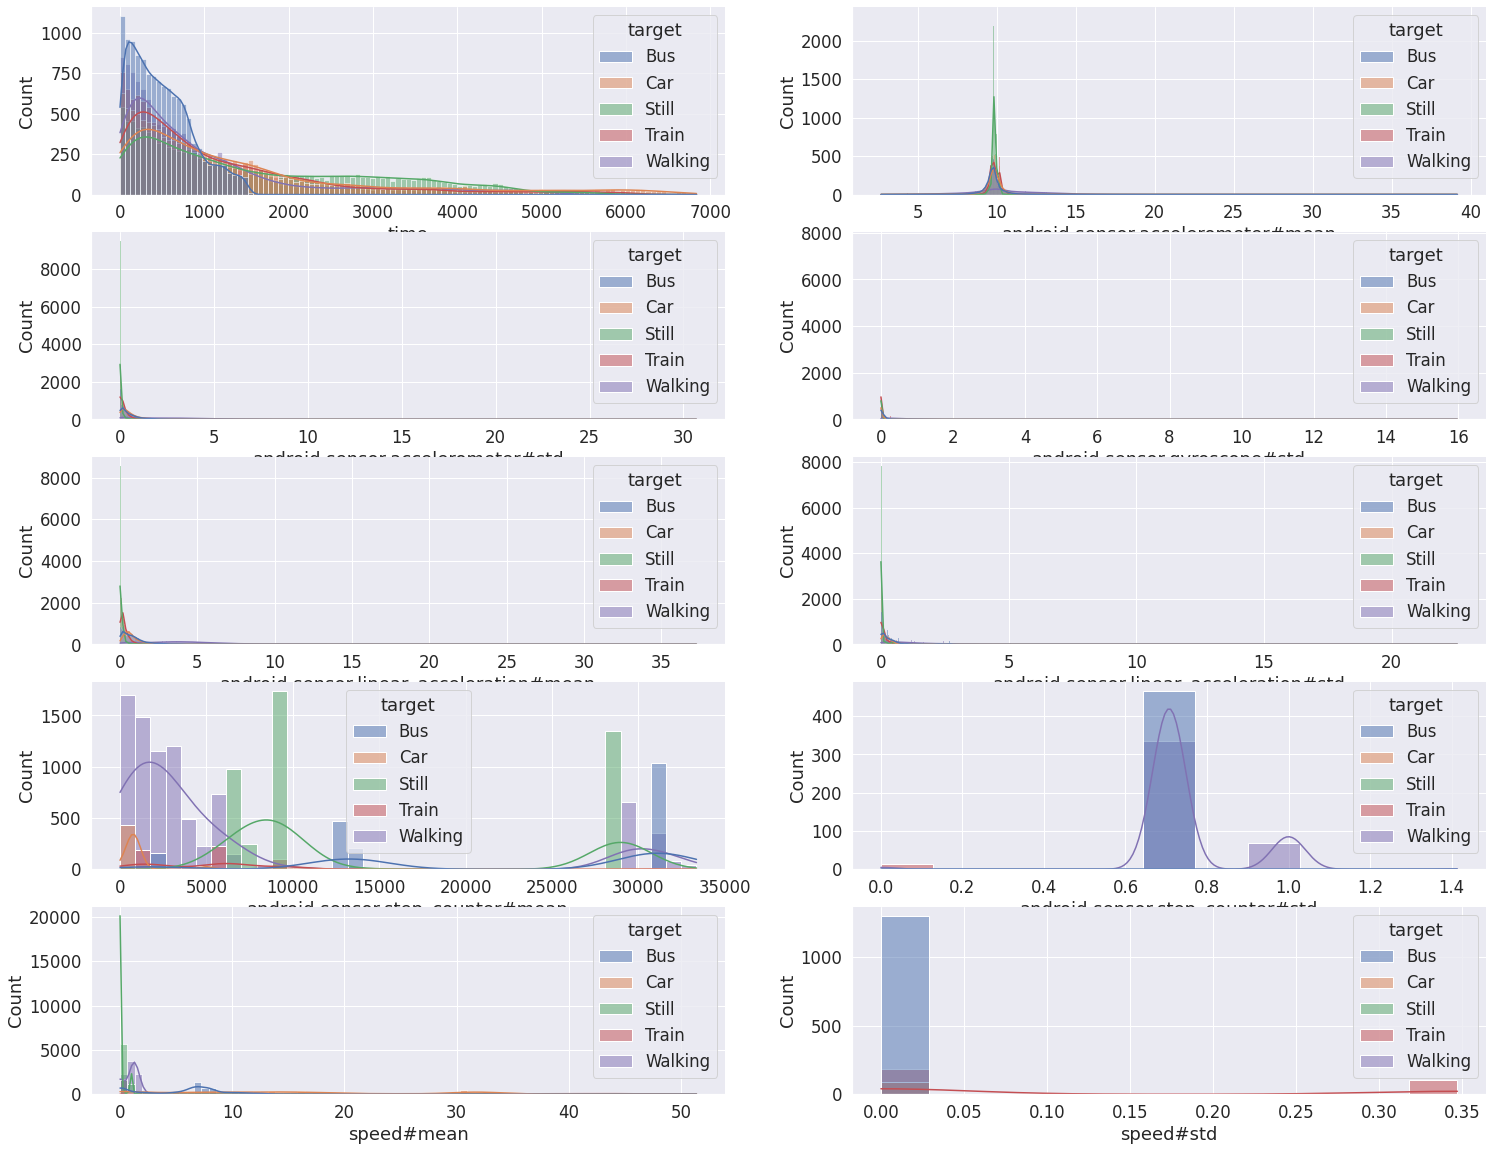

In [ ]:
plt.figure(figsize=(25, 20))
sns.set(font_scale= 1.5)

for i, feature in enumerate(num_vars):
    plt.subplot(5, 2, i+1)
    sns.histplot(x=small_df[feature], kde=True,color="r",hue=small_df["target"])
    #plt.xlim(x_limite[i])
sns.despine()

In [ ]:
train_users = small_df[ppdf['user'] != "U12"]
test_user = small_df[ppdf['user'] == "U12"]
x_train=train_users[num_vars+cat_vars]
y_train=train_users["target"].map({"Bus":1, "Car":2, "Still": 3, "Train":4, "Walking": 5})
x_test=test_user[num_vars+cat_vars]
y_test=test_user["target"].map({"Bus":1, "Car":2, "Still": 3, "Train":4, "Walking": 5})
x_train.head()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#std,android.sensor.linear_acceleration#mean,android.sensor.linear_acceleration#std,android.sensor.step_counter#mean,android.sensor.step_counter#std,speed#mean,speed#std
11243,232.0,9.772213,0.028840,0.086472,0.049975,0.0,0.0,0.0,0.0
11244,233.0,9.775592,0.022043,0.086472,0.049975,0.0,0.0,0.0,0.0
11245,234.0,9.766792,0.035640,0.086472,0.049975,0.0,0.0,0.0,0.0
11246,235.0,9.792534,0.043367,0.086472,0.049975,0.0,0.0,0.0,0.0
11247,236.0,9.771936,0.043650,0.086472,0.049975,0.0,0.0,0.0,0.0


#### Handling Null Data

### Preprocessing

In [ ]:
cat_vars=[]#["user"]
num_vars=['time',
 'android.sensor.accelerometer#mean',
 #'android.sensor.accelerometer#min',
 #'android.sensor.accelerometer#max',
 'android.sensor.accelerometer#std',
 #'android.sensor.game_rotation_vector#mean',
 #'android.sensor.game_rotation_vector#min',
 #'android.sensor.game_rotation_vector#max',
 #'android.sensor.game_rotation_vector#std',
 #'android.sensor.gyroscope#mean',
 #'#android.sensor.gyroscope#min',
 #'android.sensor.gyroscope#max',
 'android.sensor.gyroscope#std',
 'android.sensor.linear_acceleration#mean',
 #'android.sensor.linear_acceleration#min',
 #'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#std',
 #'android.sensor.orientation#mean',
 #'android.sensor.orientation#min',
 #'android.sensor.orientation#max',
 #'android.sensor.orientation#std',
 'android.sensor.step_counter#mean',
 #'android.sensor.step_counter#min',
 #'android.sensor.step_counter#max',
 'android.sensor.step_counter#std',
 'speed#mean',
 #'speed#min',
 #'speed#max',
 'speed#std']

In [ ]:
cat_4_tree_Models = pipeline.Pipeline(steps=[
    ('one hot', preprocessing.OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=45654))])


num_4_tree_Models=pipeline.Pipeline(steps=[
    (("quantile transformer",preprocessing.QuantileTransformer(n_quantiles=100, random_state=0,
    output_distribution='normal')))])



tree_prepro=compose.ColumnTransformer(transformers=[
    ("categorical",cat_4_tree_Models,cat_vars),
    ("numerical",num_4_tree_Models,num_vars)]) 

tree_prepro

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('one hot',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=45654))]),
                                 []),
                                ('numerical',
                                 Pipeline(steps=[('quantile transformer',
                                                  QuantileTransformer(n_quantiles=100,
                                                                      output_distribution='normal',
                                                                      random_state=0))]),
                                 ['time', 'android.sensor.accelerometer#mean',
                                  'android.sensor.accelerometer#std',
                                  'android.sensor.linear_acceleration#mean',
                                  'android.sensor.linear_acceleration#std',
                                  'android.sensor.step_counter#mean',
                                  'android.sensor.step_counter#std',
                                  'speed#mean', 'speed#std'])])

### Machine Learning Tree Model Selection

In [ ]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

In [ ]:
#####################################################
## TEST TRAIN  SPLIT --> USER 12 TEST. ELSE TRAIN 

In [ ]:
# YOUR CODE HERE
tree_pipelines={
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Skl GBM": GradientBoostingClassifier(),
    "Skl HistGBM": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier() 
    }

tree_pipelines = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_pipelines.items()}

tree_pipelines["XGBoost"]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one hot',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=45654))]),
                                                  []),
                                                 ('numerical',
                                                  Pipeline(steps=[('quantile '
                                                                   'transformer',
                                                                   QuantileTransformer(n_quantiles=100,
                                                                                       output_distribution='normal',
                                                                                       random_state=0))]),
                                                  ['time',
                                                   'android.sensor....
                               importance_type='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, reg_alpha=None,
                               reg_lambda=None, scale_pos_weight=None,
                               subsample=None, tree_method=None,
                               validate_parameters=None, verbosity=None))])

In [ ]:
y_train.unique()

NameError: name 'y_train' is not defined

In [ ]:
clf=XGBClassifier().fit(x_train,y_train)
pred2=clf.predict(x_test)
metrics.balanced_accuracy_score(y_test, pred2)*100


NameError: name 'x_train' is not defined

In [ ]:

x_train2, x_val, y_train2, y_val = model_selection.train_test_split(x_train,y_train, test_size=0.2,stratify = y_train, random_state=4)




results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for model_name, model in tree_pipelines.items():
    start_time = time.time()
    
    # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    model.fit(x_train2,y_train2)
    # GET PREDICTIONS USING x_val
    pred = model.predict(x_val)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              





results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

NameError: name 'x_train' is not defined

In [ ]:

from sklearn.model_selection import cross_val_predict

skf = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)




results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})





for model_name, model in tree_pipelines.items():
    start_time = time.time()


        
    # TRAIN AND GET PREDICTIONS USING cross_val_predict() and x,y
    pred = cross_val_predict(model, x_train,y_train, cv=skf)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_train, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_train, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              


results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')


1:	learn: 0.6254819	total: 8.05ms	remaining: 4.02s
2:	learn: 0.5963364	total: 11.5ms	remaining: 3.83s
3:	learn: 0.5722254	total: 21.3ms	remaining: 5.31s
4:	learn: 0.5408168	total: 26.3ms	remaining: 5.24s
5:	learn: 0.5155530	total: 35.7ms	remaining: 5.91s
6:	learn: 0.4860244	total: 38.8ms	remaining: 5.51s
7:	learn: 0.4612313	total: 40.4ms	remaining: 5.01s
8:	learn: 0.4393660	total: 43.5ms	remaining: 4.79s
9:	learn: 0.4188549	total: 45.6ms	remaining: 4.51s
10:	learn: 0.3996324	total: 48.8ms	remaining: 4.38s
11:	learn: 0.3812610	total: 51.4ms	remaining: 4.23s
12:	learn: 0.3620755	total: 54.2ms	remaining: 4.12s
13:	learn: 0.3453024	total: 58.7ms	remaining: 4.14s
14:	learn: 0.3280359	total: 62.3ms	remaining: 4.09s
15:	learn: 0.3093777	total: 63.8ms	remaining: 3.92s
16:	learn: 0.2965995	total: 66.9ms	remaining: 3.87s
17:	learn: 0.2826033	total: 69.8ms	remaining: 3.81s
18:	learn: 0.2703236	total: 72.6ms	remaining: 3.75s
19:	learn: 0.2542998	total: 74.3ms	remaining: 3.64s
20:	learn: 0.2429740	

,Model,Accuracy,Bal Acc.,Time
1,Decision Tree,100.000000,100.000000,0.448798
2,Extra Trees,100.000000,100.000000,2.545717
3,Random Forest,100.000000,100.000000,3.471465
4,AdaBoost,100.000000,100.000000,0.459013
5,Skl GBM,100.000000,100.000000,2.610622
6,Skl HistGBM,100.000000,100.000000,2.556997
7,XGBoost,100.000000,100.000000,1.394164
8,LightGBM,100.000000,100.000000,1.481588
9,CatBoost,100.000000,100.000000,44.333970


In [ ]:
df=pd.read_csv("/work/U1/sensorfile_U1_Bus_1480485018989.csv",sep=")",header=None)
df.columns=["main"]

# Calculate calories

Minimum burned calories per day:

For men: 66 + (6.2 x weight) + (12.7 x height) – (6.76 x age) 

For women: 655.1 + (4.35 x weight) + (4.7 x height) – (4.7 x age)

In [ ]:
def daily_cal(sex='male',weight=80,height=170,age=35):
    #weight in kg, height in cm
    if sex == 'male':
        result = 66 + 6.2*weight + 12.7*height - 6.76*age
    if sex == 'female':
        result = 655.1 + 4.35*weight + 4.7*height - 4.7*age
    return result

daily_cal()

2484.4

Calories burned walking

Weight	3.5 mph — flat surface	3.5 mph — uphill
130 lbs.	224 cal.	354 cal.
155 lbs.	267 cal.	422 cal.
180 lbs.	311 cal.	490 cal.
205 lbs.	354 cal.	558 cal.

The average person will burn between 80 to 140 calories per mile. 30 minutes of running will burn between 280 and 520 calories, depending on your weight and speed. The calories burned running will depend on your weight, time spent running and to a lesser degree, your speed. Use the calculator for a custom calculation.


Total calories burned = Duration (in minutes)*(MET*3.5*weight in kg)/2002﻿

Calculators have an activity MET (metabolic equivalent for task) built-in. This number estimates how much energy the body uses during a specific activity. It varies based on activity and is standardized so that it can be used across the board for different people and so that it's easier to compare different activities to each other.

At rest or sitting idly, the average person expends 1 MET, which equals:

1 kilocalorie per kilogram of body weight times minutes of activity

Under 3 MET: Light-intensity activities

3 to 6 MET: Moderate-intensity aerobic physical activities

Over 6 MET: Vigorous-intensity aerobic physical activities

In [ ]:
new=[]
for row in df["main"]:
    a=row.split(",")
    new.append(len(a))

In [ ]:
columns=[i for i in range(max(new))]
columns

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [ ]:
for i in columns:
    df[i]=np.nan

result=[]
new=[]
for row in range(len(df["main"])):
    a=df["main"][row].split(",")
    #print(a)
    for i in range(len(a)):
        df[i][row]=a[i]

df #name the columns


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,main,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,"2,android.sensor.accelerometer,0.5828552,6.734...",2.0,android.sensor.accelerometer,0.582855,6.734940,6.423767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"63,android.sensor.accelerometer,0.48954773,6.8...",63.0,android.sensor.accelerometer,0.489548,6.811951,7.616898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"111,android.sensor.accelerometer,0.23820496,6....",111.0,android.sensor.accelerometer,0.238205,6.443451,7.495621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"160,android.sensor.accelerometer,0.25022888,6....",160.0,android.sensor.accelerometer,0.250229,6.151337,6.884811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"214,android.sensor.gyroscope,-0.3206787,-7.476...",214.0,android.sensor.gyroscope,-0.320679,-0.000748,-0.123337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9745,"500295,android.sensor.rotation_vector,-0.09396...",500295.0,android.sensor.rotation_vector,-0.093969,-0.379427,-0.911158,0.130368,0.174533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9746,"500347,android.sensor.gyroscope_uncalibrated,0...",500347.0,android.sensor.gyroscope_uncalibrated,0.051865,0.325439,0.337738,0.025589,0.013428,-0.021484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9747,"500401,android.sensor.accelerometer,2.9073944,...",500401.0,android.sensor.accelerometer,2.907394,5.206390,5.968475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9748,"500452,android.sensor.rotation_vector,-0.09822...",500452.0,android.sensor.rotation_vector,-0.098223,-0.390182,-0.900756,0.163548,0.174533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dd66c499-8cd9-44d2-87d5-ecc9c3ddd387' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>